In [3]:
#import libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.api import OLS
from statsmodels.tsa.stattools import adfuller
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pymannkendall as mk
import seaborn as sns

In [98]:
#import dataset aqua
ds = xr.open_dataarray('West_Africa_aqua.nc')
ds

<xarray.DataArray 'AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean' (time: 204, lat: 50, lon: 90)>
[918000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2003-01-16T12:00:00 ... 2019-12-16T12:00:00
  * lat      (lat) float64 0.5 0.5 1.5 1.5 2.5 2.5 ... 22.5 23.5 23.5 24.5 24.5
  * lon      (lon) float64 -24.5 -24.5 -23.5 -23.5 -22.5 ... 18.5 18.5 19.5 19.5
Attributes:
    long_name:                            Combined Dark Target and Deep Blue ...
    units:                                none
    hdf_name:                             AOD_550_Dark_Target_Deep_Blue_Combi...
    Weighting:                            MinNumDays
    Derived_From_Level_3_Daily_Data_Set:  AOD_550_Dark_Target_Deep_Blue_Combi...
    Aggregation_Data_Set:                 None
    QA_Value_Num_Bits:                    2
    QA_Value_Start_Bit:                   1
    QA_Useful_Flag_Bit:                   0
    QA_Byte:                              5
    Statistic_Type:                       Simple_MND
    Quality_Assurance_Data_Set:           Quality_Assurance_Land
    Included_Level_2_Nighttime_Data:      False
    Level_2_Pixel_Values_Read_As:         Real

In [46]:
ds.shape

(204, 50, 90)

In [50]:
ds.dims

('time', 'lat', 'lon')

In [51]:
#plotting the seasonal data
seasonal = ds.groupby('time.season').mean(dim= 'time')

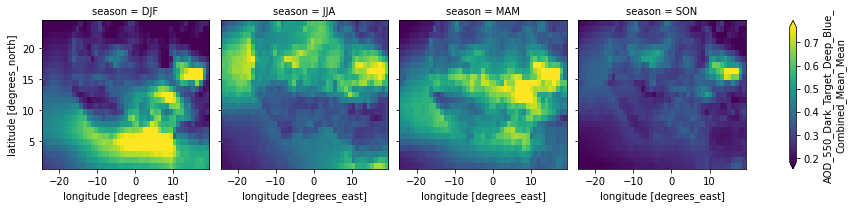

In [52]:
seasonal.plot.imshow(col = 'season', robust = True)


In [79]:
#timeseries of the plot.
ts = ds.mean(dim = 'time')


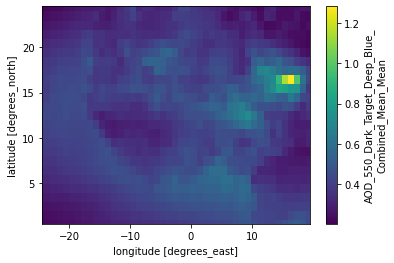

In [84]:
ts.plot()

In [132]:
#stack columns
ds_stacked= ds.stack(points=['lat','lon'])

In [140]:
West= ds_stacked.dropna(dim = 'points')


In [159]:
West


<xarray.DataArray 'AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean' (time: 204, points: 3500)>
array([[0.29700002, 0.29700002, 0.314     , ..., 0.26000002, 0.216     ,
        0.216     ],
       [0.29700002, 0.29700002, 0.31      , ..., 0.28800002, 0.257     ,
        0.257     ],
       [0.23500001, 0.23500001, 0.261     , ..., 0.30400002, 0.26900002,
        0.26900002],
       ...,
       [0.19100001, 0.19100001, 0.16900001, ..., 0.24000001, 0.22700001,
        0.22700001],
       [0.143     , 0.143     , 0.15300001, ..., 0.178     , 0.171     ,
        0.171     ],
       [0.18100001, 0.18100001, 0.18400002, ..., 0.178     , 0.162     ,
        0.162     ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2003-01-16T12:00:00 ... 2019-12-16T12:00:00
  * points   (points) MultiIndex
  - lat      (points) float64 0.5 0.5 0.5 0.5 0.5 ... 24.5 24.5 24.5 24.5 24.5
  - lon      (points) float64 -24.5 -24.5 -23.5 -23.5 ... 18.5 18.5 19.5 19.5
Attributes:
    long_name:                            Combined Dark Target and Deep Blue ...
    units:                                none
    hdf_name:                             AOD_550_Dark_Target_Deep_Blue_Combi...
    Weighting:                            MinNumDays
    Derived_From_Level_3_Daily_Data_Set:  AOD_550_Dark_Target_Deep_Blue_Combi...
    Aggregation_Data_Set:                 None
    QA_Value_Num_Bits:                    2
    QA_Value_Start_Bit:                   1
    QA_Useful_Flag_Bit:                   0
    QA_Byte:                              5
    Statistic_Type:                       Simple_MND
    Quality_Assurance_Data_Set:           Quality_Assurance_Land
    Included_Level_2_Nighttime_Data:      False
    Level_2_Pixel_Values_Read_As:         Real

In [144]:
result = seasonal_decompose(West, period = 12)

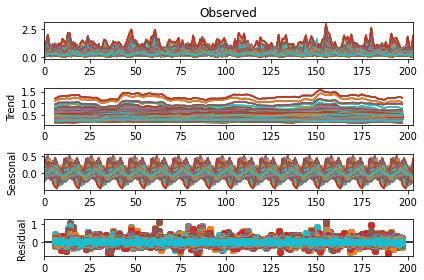

In [145]:
fig = result.plot()

In [158]:
deseason = result.trend+result.resid

In [86]:
ds1 = xr.open_dataset('West_Africa_aqua.nc')
ds1



<xarray.Dataset>
Dimensions:                                           (lat: 50, lon: 90, time: 204)
Coordinates:
  * time                                              (time) datetime64[ns] 2003-01-16T12:00:00 ... 2019-12-16T12:00:00
  * lat                                               (lat) float64 0.5 ... 24.5
  * lon                                               (lon) float64 -24.5 ... 19.5
Data variables:
    AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean  (time, lat, lon) float32 ...

In [108]:
t = ds1.AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean


In [101]:
t1 = t.time
t1

<xarray.DataArray 'time' (time: 204)>
array(['2003-01-16T12:00:00.000000000', '2003-02-16T12:00:00.000000000',
       '2003-03-16T12:00:00.000000000', ..., '2019-10-16T12:00:00.000000000',
       '2019-11-16T12:00:00.000000000', '2019-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2003-01-16T12:00:00 ... 2019-12-16T12:00:00
Attributes:
    long_name:  time
    axis:       T

In [103]:
tt = t1.to_dataframe() 
tt.drop(columns = 'time')
tt.shape

(204, 1)

In [116]:
long = t.lon
long1 = long.to_dataframe()
long1.drop(columns = 'lon')

""
lon
-24.5
-24.5
-23.5
-23.5
-22.5
...
17.5
18.5
18.5


In [112]:
latt = t.lat
latt1 = latt.to_dataframe()

In [115]:
latt1.drop(columns = 'lat')

""
lat
0.5
0.5
1.5
1.5
2.5
2.5
3.5
3.5
4.5


In [117]:
#putting the datsets together
West = pd.concat([tt,latt1,long1], axis = 1)

,time,lat,lon


In [ ]:
#saving the datasets

new_filename_1 = './West_Africa_aqua.nc'
print ('saving to ', new_filename_1)
West_Africa.to_netcdf(path=new_filename_1)
print ('finished saving')